In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Exploration

Binary dataset, 564 of class 1 and 282 of class 2, together 846

1    564
2    282
Name: Class, dtype: int64


([<matplotlib.axis.XTick at 0x7f0600f2e250>,
 [Text(0, 0, 'Class 2'), Text(1, 0, 'Class 1')])

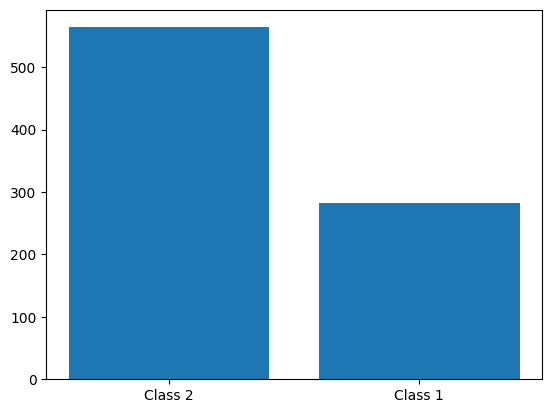

In [329]:
df = pd.read_csv("train.csv")
df.sample()
df.loc[:, "V1":"V3"]
classes = df.loc[:, "Class"].value_counts()
#print(classes, sum(classes))
y_pos = np.arange(len(classes), step=1)
print(classes)
plt.bar(y_pos, classes)
plt.xticks(y_pos, {"Class 1", "Class 2"})


In [330]:
any(df.isnull())    # Missing values
df.isnull().sum()
df = df.fillna(df.mean())   # Fill missing values with the mean values
df.loc[:, "Class"]

3       2
5       2
6       2
7       2
8       2
       ..
1050    1
1052    1
1053    1
1054    1
1055    1
Name: Class, Length: 846, dtype: int64

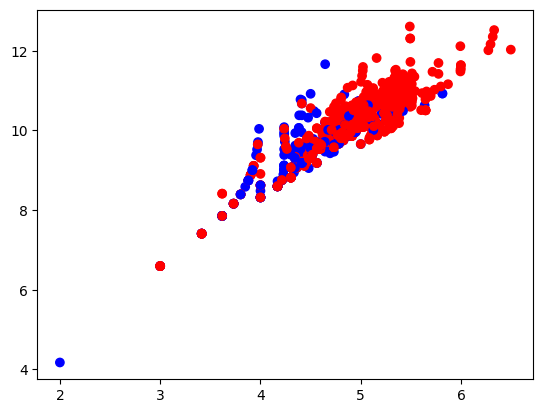

In [374]:
colors = ["red" if c == 1 else "blue" for c in df["Class"]]
labels = ["Class1" if c == 1 else "Class 2" for c in df["Class"]]
df.describe()
plt.scatter(x=df.loc[:,"V1"], y=df.loc[:,"V15"], c=colors)

Text(0.5, 0.98, 'Pairs of features, colored by the class')

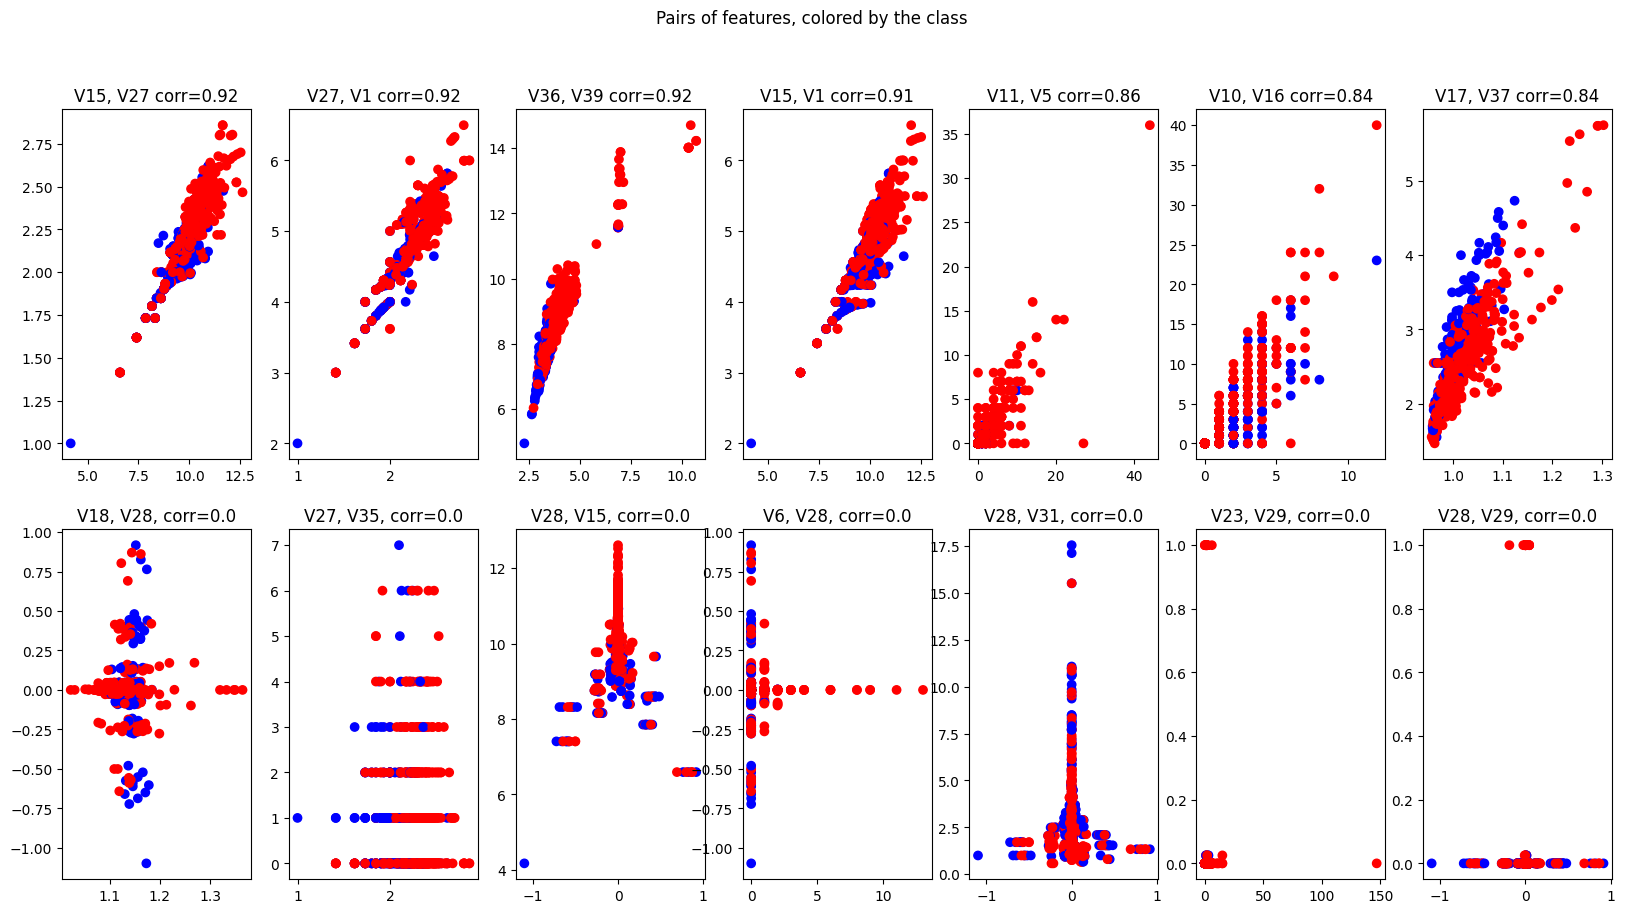

In [379]:
corr = abs(df.corr())   # Only need the magnitude

#corr = np.array(corr)   # Convert to numpy array
#corr = corr[~np.eye(corr.shape[0], dtype=bool)].reshape(corr.shape[0], -1)  # Remove diagonal elements
#corr = pd.DataFrame(corr) # Convert back to dataframe

corr = corr.unstack().sort_values(ascending=False)  # Convert to Series and sort

corr = corr.reset_index()   # Reset labels
corr.columns = ["feature1", "feature2", "corr"] # Rename labels

fig, ax = plt.subplots(2,7, figsize=(20,10))

displayed = set()

n = 0
for i in range(len(corr)):
    if n == 7:
        break
    pair = corr.iloc[i]
    if pair[0] and pair[1] and pair[0] != pair[1] and (pair[0], pair[1]) not in displayed and (pair[1], pair[0]) not in displayed:
        ax[0,n].scatter(x=df[pair[0]], y=df[pair[1]], c=colors, label=labels)  # Display pairs with highest correlations
        ax[0,n].set_title(f"{pair[0]}, {pair[1]} corr={round(pair[2], 2)}")
        
        displayed.add((pair[0], pair[1]))
        n += 1

n = 0
for i in range(len(corr)):
    if n >= 7:
        break
    
    pair = corr[::-1].iloc[i]
    if pair[0] and pair[1] and (pair[0], pair[1]) not in displayed and (pair[1], pair[0]) not in displayed:
        ax[1,n].scatter(x=df[pair[0]], y=df[pair[1]], c=colors, label=labels)  # Display pairs with lowest correlations
        ax[1,n].set_title(f"{pair[0]}, {pair[1]}, corr={round(pair[2], 2)}")
        
        displayed.add((pair[0], pair[1]))        
        n += 1
        
fig.suptitle("Pairs of features, colored by the class")

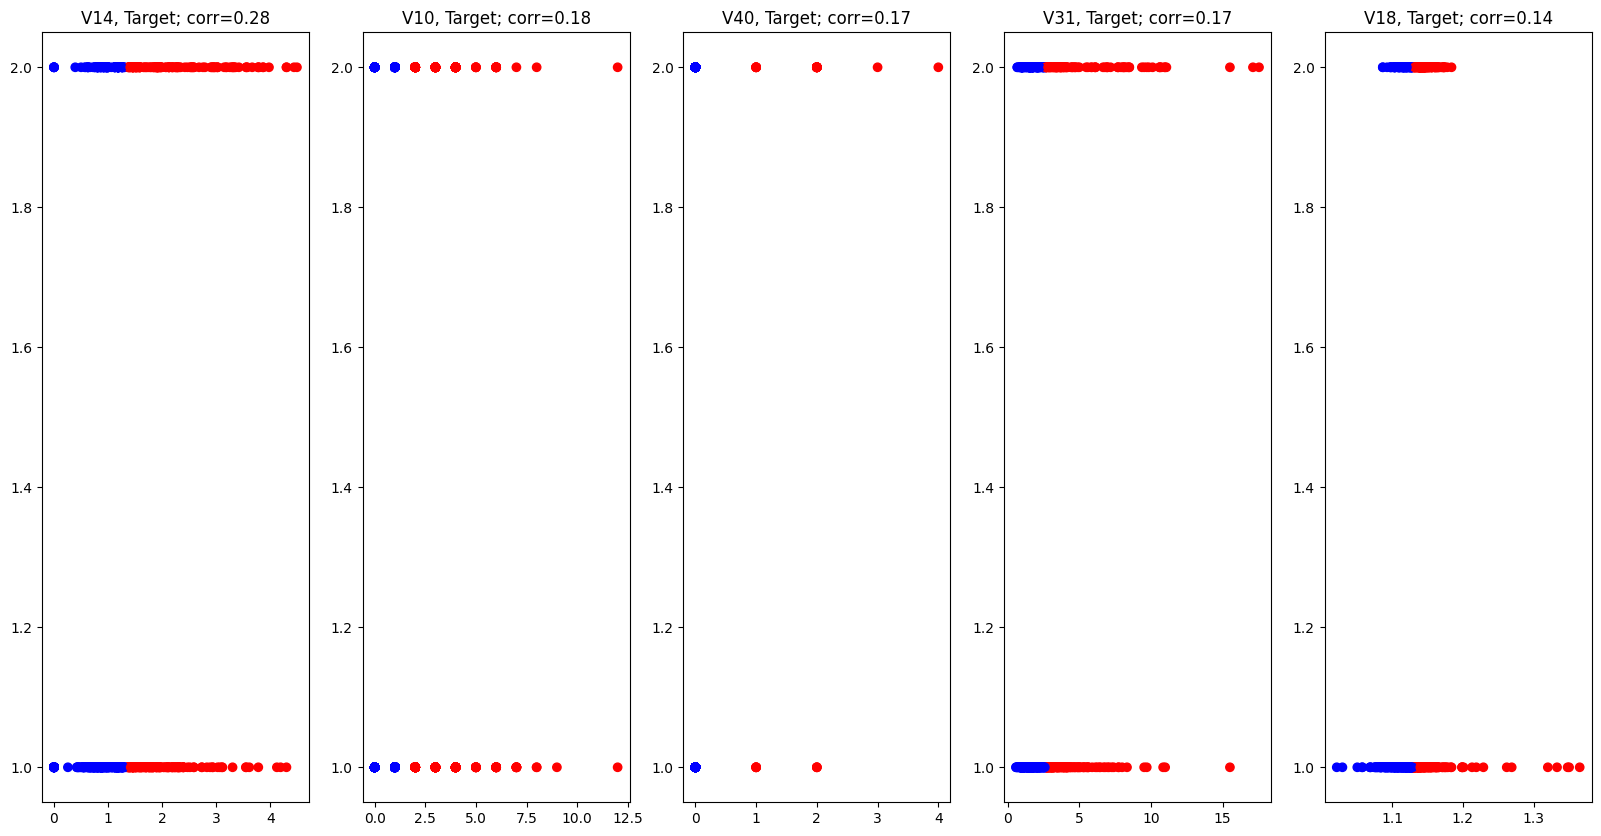

In [370]:
# Get correlation of each feature to the target class and plot the ones with highest correlation
fig, ax = plt.subplots(1,5, figsize=(20,10))

target_corr = df.corr()
pairs = []

for i in range(len(target_corr)-1):
    pairs.append((f"V{i+1}", target_corr.iloc[i,-1]))

pairs = sorted(pairs, key=lambda x: x[1])
pairs = pairs[::-1]

def get_colors(feature: str) -> np.ndarray:
    '''
        Colors the points based on their value compared to the mean
    '''
    mean = np.mean(df[feature])
    target_colors = ["red" if f > mean else "blue" for f in df[feature]]
    return target_colors
    
     

for i in range(5):
    ax[i].scatter(x=df.loc[:,pairs[i][0]], y=df.loc[:,"Class"], label=pairs[i][0], c=get_colors(pairs[i][0]))
    ax[i].set_title(f"{pairs[i][0]}, Target; corr={round(pairs[i][1], 2)}")
        
    

In [334]:
#"Class" in set(corr.loc[:,"feature1"].values)

In [357]:
df.corr()#.iloc[:,26]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
V1,1.000000,0.205076,0.254861,0.015728,0.159220,0.439486,0.414722,0.367828,0.191237,0.251870,...,0.304454,0.122755,0.028396,0.275653,0.084133,0.052688,0.456649,0.090291,0.322993,-0.390415
V2,0.205076,1.000000,0.055674,-0.049591,-0.195237,0.293303,-0.256014,-0.311666,0.148047,0.208977,...,-0.099808,-0.177999,0.050858,0.086335,0.483463,-0.061307,0.077222,-0.072133,0.320019,0.001660
V3,0.254861,0.055674,1.000000,0.014161,-0.005667,0.072305,0.260813,0.105008,-0.131945,-0.142928,...,0.450812,-0.036711,-0.140998,0.456264,0.049047,-0.046961,0.576593,-0.064324,0.592297,-0.302944
V4,0.015728,-0.049591,0.014161,1.000000,0.372430,-0.011787,0.136468,-0.040520,0.003784,0.027928,...,0.176654,0.482456,0.091906,-0.009431,0.033291,0.471792,0.040437,-0.009247,0.003264,-0.080699
V5,0.159220,-0.195237,-0.005667,0.372430,1.000000,-0.020752,0.316655,0.116935,-0.006721,0.077223,...,0.274856,0.782771,0.204229,0.024812,-0.038391,0.739065,0.125101,-0.042260,-0.043355,-0.220798
V6,0.439486,0.293303,0.072305,-0.011787,-0.020752,1.000000,0.088593,-0.059911,0.473541,0.065440,...,-0.042440,-0.068288,0.028520,0.002103,0.256761,-0.089813,0.106610,-0.039306,0.620911,-0.161577
V7,0.414722,-0.256014,0.260813,0.136468,0.316655,0.088593,1.000000,0.589590,0.153953,0.118021,...,0.785801,0.285991,0.111618,0.209803,-0.069843,0.141338,0.392942,0.114507,0.143584,-0.319427
V8,0.367828,-0.311666,0.105008,-0.040520,0.116935,-0.059911,0.589590,1.000000,-0.230195,-0.139921,...,0.402698,0.069514,-0.253218,0.129190,-0.219152,-0.125067,0.257238,0.116393,0.066179,-0.181887
V9,0.191237,0.148047,-0.131945,0.003784,-0.006721,0.473541,0.153953,-0.230195,1.000000,0.206048,...,-0.083710,-0.043524,0.039392,-0.016390,-0.198922,-0.101703,0.030586,-0.012227,-0.073238,-0.065466
V10,0.251870,0.208977,-0.142928,0.027928,0.077223,0.065440,0.118021,-0.139921,0.206048,1.000000,...,0.092834,0.060490,0.184490,-0.051202,0.344287,0.023910,0.097281,0.241160,-0.136625,0.180573
